In [1]:
import numpy as np
from math import isclose

α, λ, d, b = 0.01, 0.1, 0.02, 0.025
g = b - d
A = np.mat(np.array([[(1 - d) * (1 - λ) + b, (1 - d) * α + b], 
     [(1 - d) * λ, (1 - d) * (1 - α)]]))

ū = (1 + g - (1 - d) * (1 - α)) /  (1 + g - (1 - d) * (1 - α) + (1 - d) * λ)

ē = 1 - ū
x̄ = np.array([[ū], [ē]])

print(np.isclose(A * x̄, (1 + g) * x̄))   # prints true

# == Plots == #

import matplotlib.pyplot as plt


def plot_paths(figname="../figures/lake_1.pdf", savefig=False):

    path_length = 100
    x_path_1 = np.zeros((2, path_length))
    x_path_2 = np.zeros((2, path_length))
    x_0_1 = 5.0, 0.1
    x_0_2 = 0.1, 4.0
    x_path_1[0, 0] = x_0_1[0]
    x_path_1[1, 0] = x_0_1[1]
    x_path_2[0, 0] = x_0_2[0]
    x_path_2[1, 0] = x_0_2[1]


    for t in range(path_length-1):
        x_path_1[:, t+1] = (A * x_path_1[:, t][np.newaxis].T).flatten()
        x_path_2[:, t+1] = (A * x_path_2[:, t][np.newaxis].T).flatten()
    

    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")
    
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    ax.set_xlabel("unemployed workforce")
    ax.set_ylabel("employed workforce")
    ax.set_xticks((0, 6))
    ax.set_yticks((0, 6))
    s = 10
    ax.plot([0, s * ū], [0, s * ē], "k--", lw=1)
    ax.scatter(x_path_1[0, :], x_path_1[1, :], s=4, c="blue")
    ax.scatter(x_path_2[0, :], x_path_2[1, :], s=4, c="green")

    ax.plot([ū], [ē], "ko", ms=4, alpha=0.6)
    ax.annotate(r"\bar x", 
             xy=(ū, ē),
             xycoords="data",
             xytext=(20, -20),
             textcoords="offset points",
             arrowprops={"arrowstyle" : "->"})

    x, y = x_0_1[0], x_0_1[1]
    lb = r"\$x_0 = ($(x), $(y))\$"
    ax.plot([x], [y], "ko", ms=2, alpha=0.6)
    ax.annotate(lb, 
                xy=(x, y),
             xycoords="data",
             xytext=(0, 20),
             textcoords="offset points",
             arrowprops={"arrowstyle" : "->"})

    x, y = x_0_2[0], x_0_2[1]
    lb = r"\$x_0 = ($(x), $(y))\$"
    ax.plot([x], [y], "ko", ms=2, alpha=0.6)
    ax.annotate(lb, 
                xy=(x, y),
             xycoords="data",
             xytext=(0, 20),
             textcoords="offset points",
             arrowprops={"arrowstyle" : "->"})

    if savefig:
        fig.savefig(figname)



def plot_growth(savefig=False, figname="../figures/lake_2.pdf"):

    path_length = 100
    x_0 = 2.1, 1.2
    x = np.zeros((2, path_length))
    x[0, 0] = 0.6 
    x[1, 0] = 1.2

    for t in range(path_length-1):
        x[:, t+1] = (A * x[:, t][np.newaxis].T).flatten()

    fig, axes = plt.subplots(3, 1)
    u = x[0, :]
    e = x[1, :]
    n = x[0, :] + x[1, :]
    paths = u, e, n
    labels = r"$u_t$", r"$e_t$", r"$n_t$"
    for (ax, path, label) in zip(axes, paths, labels):
        ax.plot(path, label=label)
        ax.legend(frameon=False, fontsize=14)
        ax.set_xlabel(r"t")
    
    plt.tight_layout()
    if savefig:
        fig.savefig(figname)

[[ True]
 [ True]]


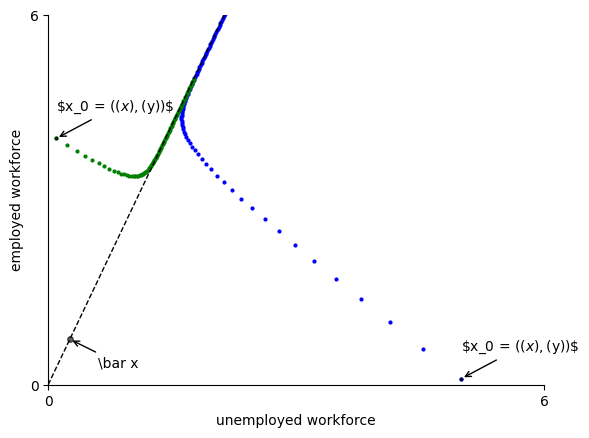

In [2]:
plot_paths(savefig=True)

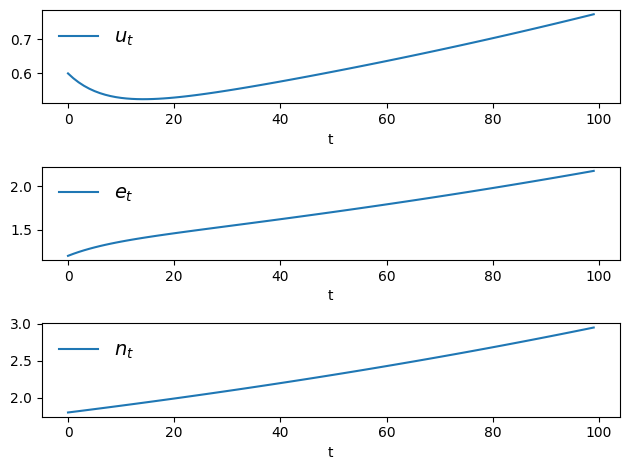

In [3]:
plot_growth(savefig=True)